# Doing Bayesian Data Analysis

An example from __Chapter 21__.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

from utils import plt, sns

In [3]:
df = pd.read_csv('data/Salary.csv', usecols=[0,3,5])
df["Org"] = df.Org.astype("category")
df["Pos"] = df.Pos.astype("category")
print df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 3 columns):
Org       1080 non-null category
Pos       1080 non-null category
Salary    1080 non-null int64
dtypes: category(2), int64(1)
memory usage: 11.1 KB
None


,Org,Pos,Salary
0,PL,FT2,72395
1,MUTH,FT2,61017
2,ENG,FT2,82370
3,CMLT,FT2,68805
4,LGED,FT3,63796


In [4]:
df.groupby("Pos").apply(lambda x: x.head(2))

Org  Pos  Salary
Pos                       
DST 29   SPEA  DST  285000
    128  MUHI  DST  114189
FT1 7    CRIN  FT1  107745
    9     PSY  FT1  173302
FT2 0      PL  FT2   72395
    1    MUTH  FT2   61017
FT3 4    LGED  FT3   63796
    6    INFO  FT3   98814
NDW 5    MGMT  NDW  219600
    8    CRIN  NDW  114275

In [8]:
X1 = df.Pos.cat.codes.values
n_X1 = len(df.Pos.cat.categories)

X2 = df.Org.cat.codes.values
n_X2 = len(df.Org.cat.categories)

y = df.Salary
y_mean = y.mean()
y_std = y.std()
y_shape, y_rate = gamma_shape_rate(y_std/2, 2 * y_std)

In [9]:
n_cols = 2
with pm.Model() as model:
    # Priors
    sigma_0 = pm.HalfCauchy("sigma_0", 25)
    beta_0 = pm.Normal("beta_0", mu=0, sd=sigma_0)
    
    sigma_1 = pm.HalfCauchy("sigma_1", 25)
    beta_1 = pm.Normal("beta_1", mu=0, sd=sigma_0, shape=n_cols)
    
    theta = pm.invlogit(beta_0 + beta_1[data])

    # Likelihood
    y = pm.Bernoulli("y", mu=theta, observed=data)

    # Sample
    trace = pm.sample(10000)
    
burn_in = 5000
trace = trace[burn_in:]

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -13,144: 100%|██████████| 200000/200000 [00:58<00:00, 3421.60it/s]   
Finished [100%]: Average ELBO = -13,152
100%|██████████| 10000/10000 [02:46<00:00, 60.21it/s]


                      mean            sd     mc_error        hpd_2.5  \
alpha_0      130350.237576  34498.355712  3351.860444   52512.777505   
alpha_1__0    52558.278169  34920.052716  3379.757489  -14992.288680   
alpha_1__1    -6276.477931  34521.457659  3363.725573  -72339.393829   
alpha_1__2   -36195.164490  34514.703544  3362.095260 -101598.412524   
alpha_1__3   -49475.854273  34515.456508  3362.105606 -118379.866778   
alpha_1__4    23863.513921  34533.979885  3356.940138  -42077.137428   
alpha_2__0    80494.842326   7628.665969   259.442885   65549.327214   
alpha_2__1   -14708.056736  10126.889830   291.607947  -34231.098282   
alpha_2__2   -16018.829751  10265.555636   304.589366  -35694.746323   
alpha_2__3   -19023.635017   8007.846359   276.515292  -33909.511797   
alpha_2__4     2554.880729   8096.022185   259.515807  -13032.995991   
alpha_2__5      -16.982057   9124.821663   260.993538  -17414.681791   
alpha_2__6    47906.716199   9102.803486   262.970340   30207.75

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ce28190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120b5a610>]], dtype=object)

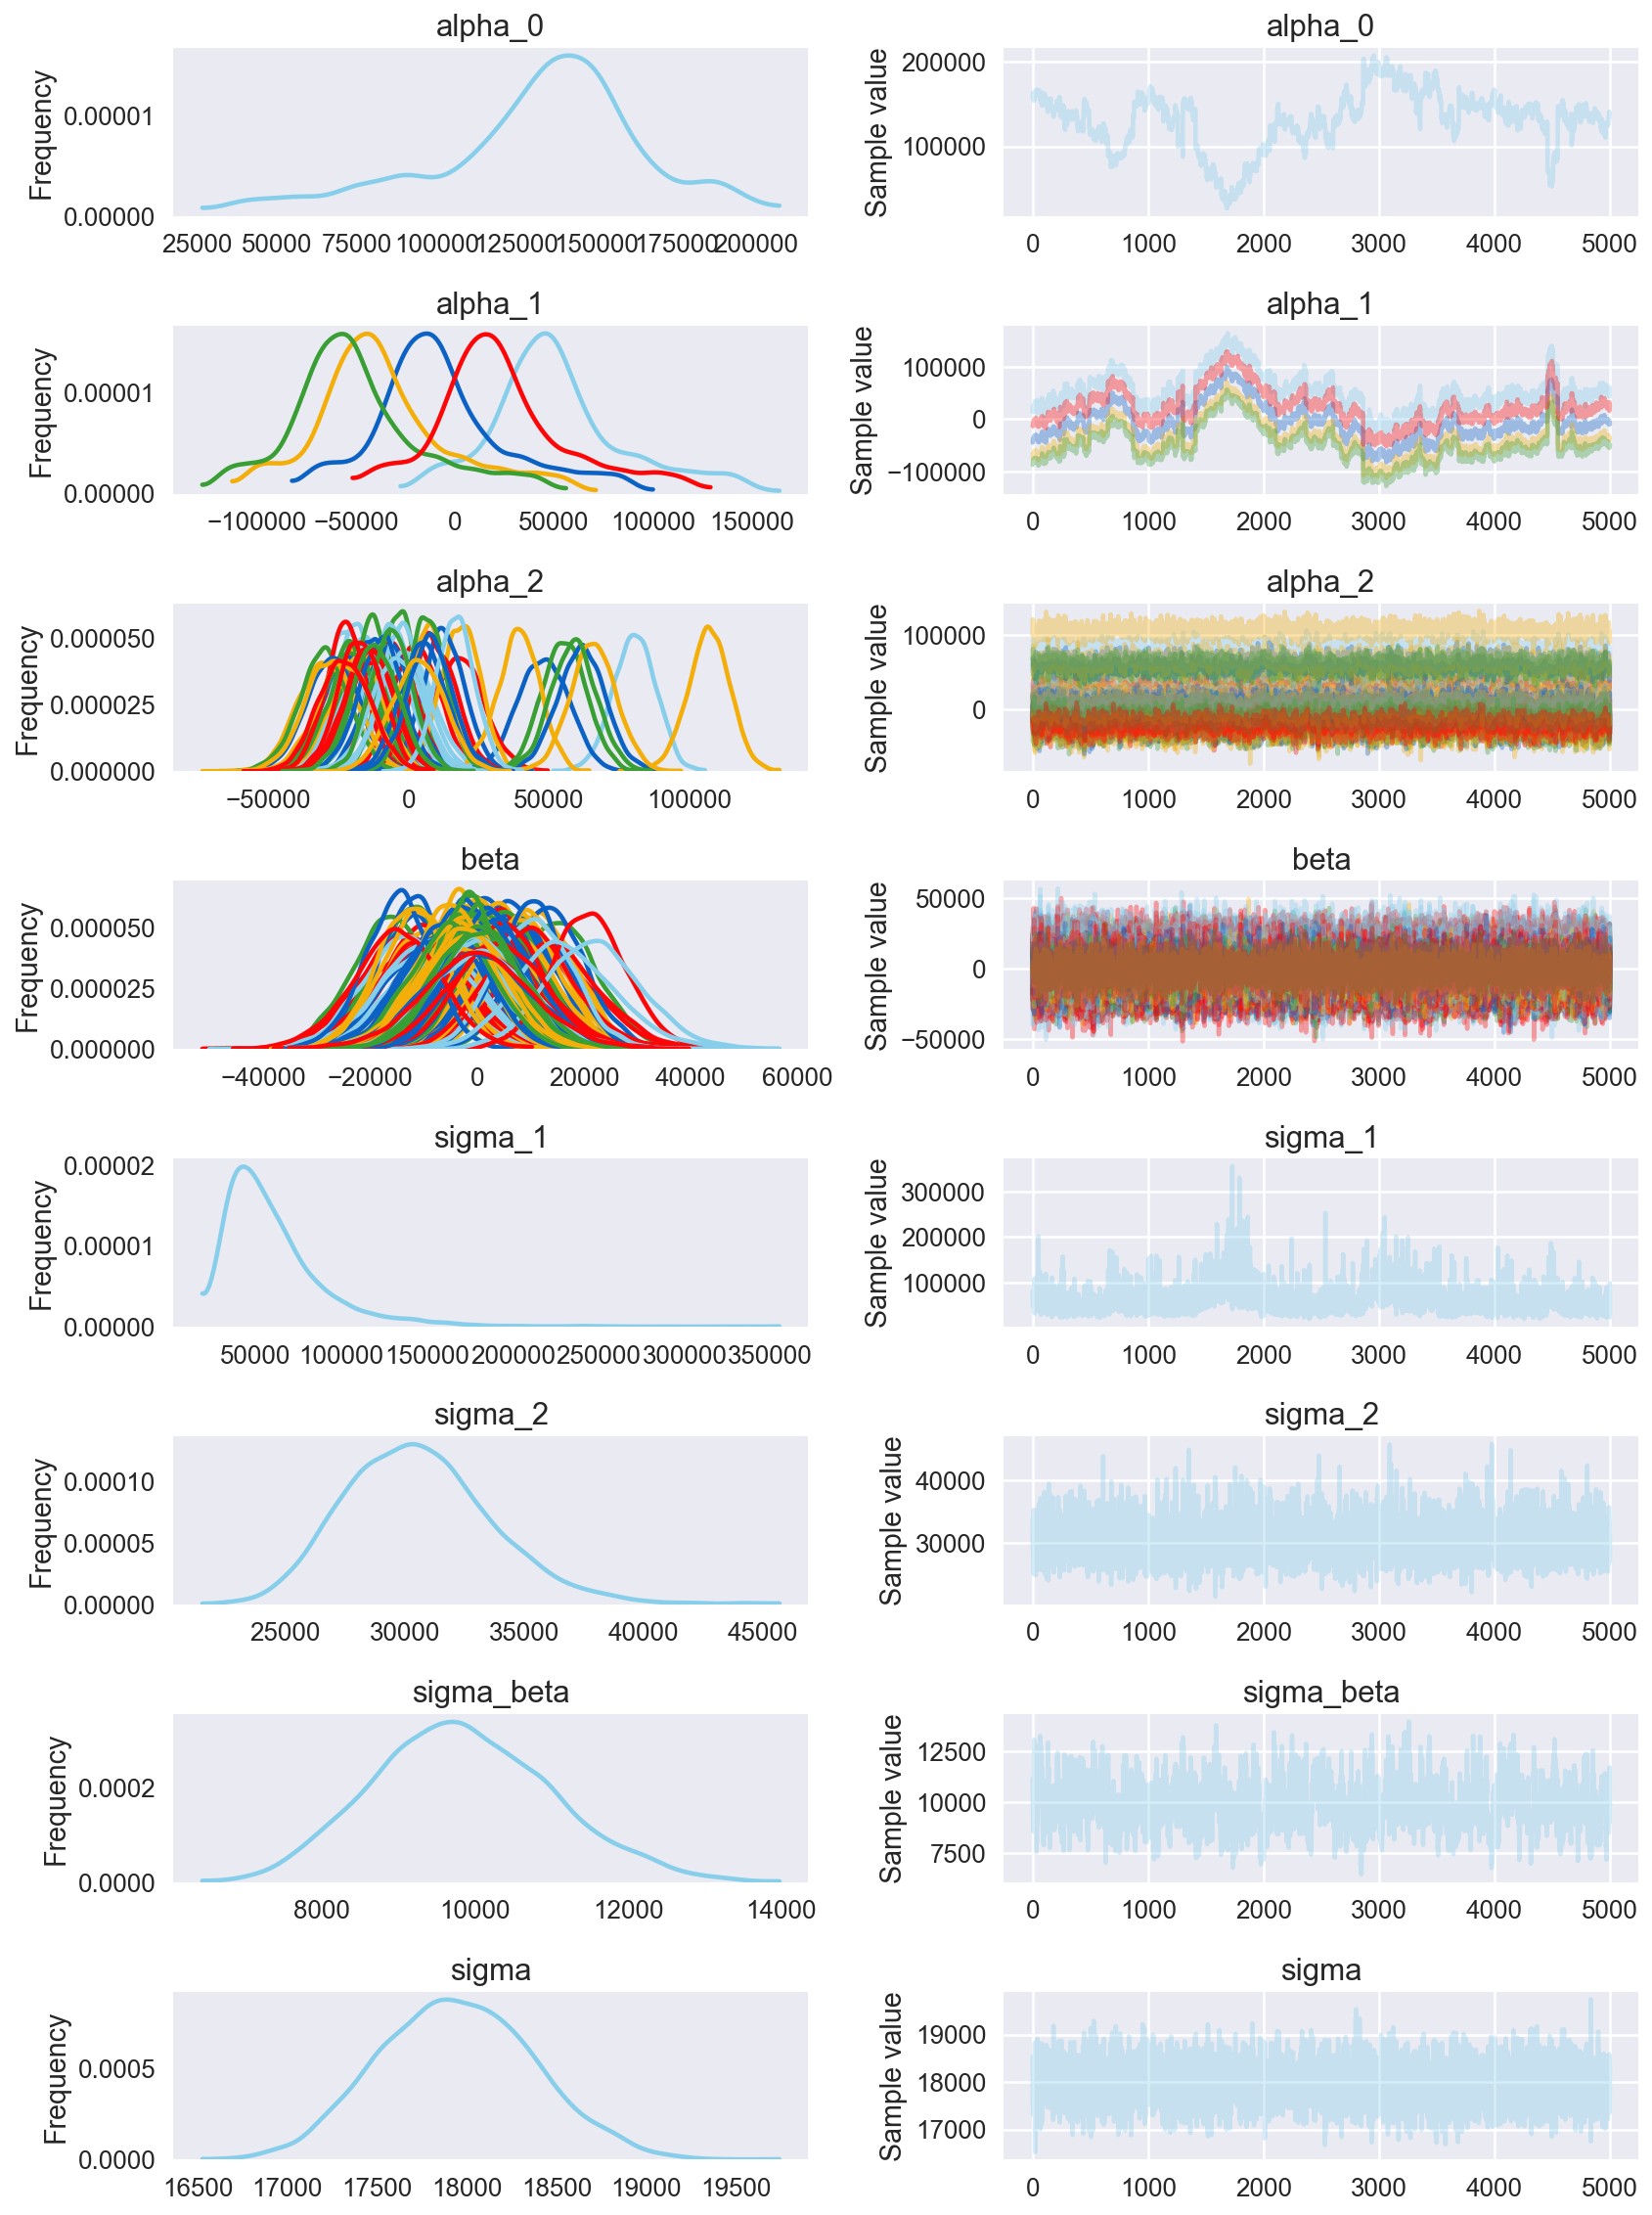

In [10]:
print(pm.df_summary(trace))
pm.traceplot(trace)

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

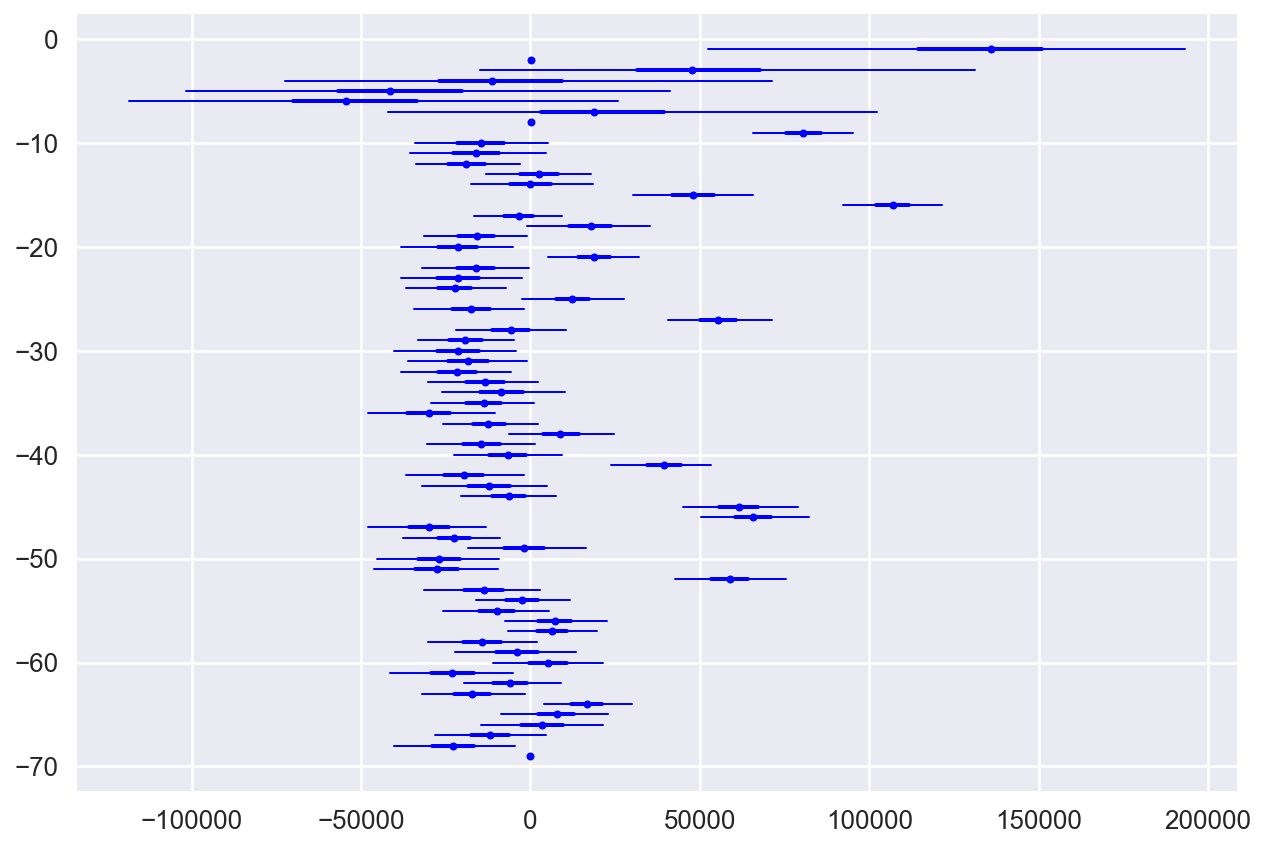

In [13]:
pm.forestplot(trace)